In [2]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video
from elastica.modules import BaseSystemCollection, Constraints, Forcing, Damping 

from elastica.rod.cosserat_rod import CosseratRod 
from elastica.dissipation import AnalyticalLinearDamper
from elastica.boundary_conditions import OneEndFixedBC
from elastica.external_forces import EndpointForces, GravityForces 
from elastica import Connections
from elastica import FixedJoint
from elastica.callback_functions import CallBackBaseClass
from elastica.timestepper import integrate, PositionVerlet
from elastica import CallBacks

from elastica.timestepper.symplectic_steppers import PositionVerlet
from collections import defaultdict
from magneto_pyelastica import *

In [27]:
m_size = 20
r_size = 3
magnetic_amplitudes = np.linspace(0,120,m_size) #mT
length_diameter_ratio = np.linspace(10,20,3)
angles = np.ones((r_size, m_size))
for i in range(r_size):
    for j in range(m_size):
        #------simulator-------
        class UniformMRodSimulator(BaseSystemCollection, Constraints, Forcing, Damping, CallBacks):
            pass
        Uniform_M_Rod_Sim = UniformMRodSimulator()

        #------mmGS unit-------
        density = 2.273  #mg/mm^3 
        base_radius = 0.3 #mm 
        base_length = length_diameter_ratio[i] * base_radius * 2 #mm 
        scale_E = 1e-3 #scale down Young's modulus
        E = 1.4e9 * scale_E #Young's modulus
        shear_modulus = E/3 # shear modulus


        dt = 1.4e-4 # time step
        nu = 5
        endtime = 5

        #------rod definition----
        n_elem = 20
        start = np.zeros((3,))
        direction = np.array([0.0,1.0,0.0])
        normal = np.array([1.0,0.0,0.0])

        Uniform_M_Rod = CosseratRod.straight_rod(n_elem, start, direction, normal, base_length, base_radius, density, youngs_modulus=E, shear_modulus=shear_modulus)
        Uniform_M_Rod_Sim.append(Uniform_M_Rod)

        #------magnetic properties------
        magnetization_density = 1.28e5 *1e-3 #A/mm
        magnetization_direction = np.ones(n_elem) * direction.reshape(3,1) 

        magnetic_amplitude = magnetic_amplitudes[j]* 1e3 * scale_E #mg*mm^2 / (A*s^2)
        magnetic_angle = np.pi /2
        magnetic_field = magnetic_amplitude * np.array([0.0, np.cos(magnetic_angle), np.sin(magnetic_angle)]) 
        magnetic_field_object = ConstantMagneticField(
            magnetic_field, ramp_interval= 0.15, start_time = 0, end_time = 5
        )

        #------constraints-------
        Uniform_M_Rod_Sim.constrain(Uniform_M_Rod).using(
            OneEndFixedBC, constrained_position_idx = (0,), constrained_director_idx = (0,)
        )

        #------forcing-----------
        Uniform_M_Rod_Sim.add_forcing_to(Uniform_M_Rod).using(
            MagneticForces, 
            external_magnetic_field = magnetic_field_object,
            magnetization_density = magnetization_density,
            magnetization_direction = magnetization_direction,
            rod_volume = Uniform_M_Rod.volume,
            rod_director_collection = Uniform_M_Rod.director_collection
        )

        #------damping-----------
        Uniform_M_Rod_Sim.dampen(Uniform_M_Rod).using(
            AnalyticalLinearDamper, damping_constant = nu, time_step = dt
        )

        #-----callback-----------
        class UniformMagneticRodCallBack(CallBackBaseClass):
            def __int__(self, step_skip:int, callback_params:dict):
                super().__init__()
                self.step_skip = step_skip
                self.callback_params = callback_params
            def make_callback(self, system, time, current_step: int):
                if current_step % self.step_skip == 0:
                    self.callback_params["time"].append(time)
                    self.callback_params["position"].append(system.position_collection.copy())
                    self.callback_params["velocity"].append(system.velocity_collection.copy())
                return 

        #------time integration---
        Uniform_M_Rod_Sim.finalize()
        timestepper = PositionVerlet()
        final_time = endtime
        total_steps = int(final_time / dt)
        integrate(timestepper, Uniform_M_Rod_Sim, final_time, total_steps)
        angles[i,j] = np.arctan(Uniform_M_Rod.position_collection[2,-1]/ Uniform_M_Rod.position_collection[1,-1]) /np.pi * 180




100%|██████████| 35714/35714 [00:04<00:00, 7866.59it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8071.06it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8295.25it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8428.11it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8384.44it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8292.79it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8394.36it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8379.69it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8269.82it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8346.81it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8195.56it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8406.63it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8393.07it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8496.91it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8411.76it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8445.08it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8244.19it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8354.45it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8484.66it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8425.48it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8277.70it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8415.03it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8425.40it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8326.02it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8451.25it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8432.72it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8369.18it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8276.63it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8459.69it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8398.49it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8138.34it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8322.82it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8384.67it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8428.29it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8241.40it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8339.72it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8434.75it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8231.08it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8383.15it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8145.10it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8259.11it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8182.73it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 7918.51it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8280.69it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8454.53it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8179.27it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8396.43it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 7565.28it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 7866.47it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 7837.36it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8309.98it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8349.34it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8377.84it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8392.00it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8269.56it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8385.10it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8336.10it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8343.11it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8304.74it/s]


Final time of simulation is :  5.000000000001456


100%|██████████| 35714/35714 [00:04<00:00, 8281.84it/s]

Final time of simulation is :  5.000000000001456


In [19]:
angles

array([[ 0.        , 38.87158272, 52.26412649, 58.87837316, 62.93554202],
       [ 0.        , 54.29236636, 64.44780106, 69.03543376, 71.76253493]])

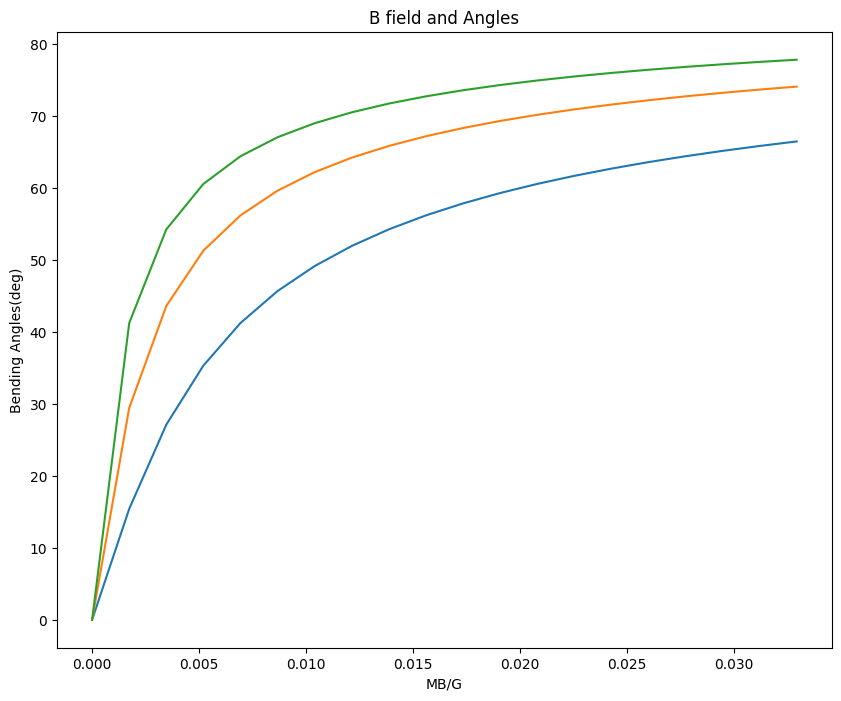

In [28]:

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.title("B field and Angles")
plt.xlabel("MB/G")
plt.ylabel("Bending Angles(deg)")
for i in range(r_size):
    ax.plot(1e-3*magnetic_amplitudes*magnetization_density/(shear_modulus*scale_E),angles[i])
plt.show()

In [16]:
np.linspace(10,20,3)

array([10., 15., 20.])